# GRAPL: Tutorial 05

Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021. 


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [3]:
import grapl.dsl as dsl
import grapl.admg as admg
import grapl.algorithms as algs
import copy
gobj = dsl.GraplDSL()

### Read an ADMG from a GRAPL text file, render using Graphviz

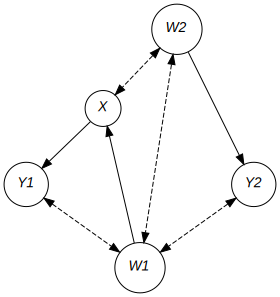

In [6]:
G = gobj.readgrapl(open('/root/HSCM/grapl/grapl/graphs/shpitser_thesis1.grapl').read())
G

### Compute the interventional distribution, $p_X(Y_2,Y_1,W_2)$ using the fixing algorithm, render resulting Latex formula

In [7]:
str, eqn, isident = algs.idfixing(G, {'X'}, {'Y1','Y2','W2'})
eqn

### Intervene on the variable $X$ and draw the mutilated ADMG

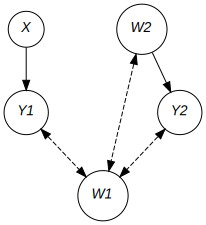

In [8]:
G_fixX = copy.deepcopy(G)
G_fixX.fix('X')
G_fixX

### Read another ADMG from a file, draw it

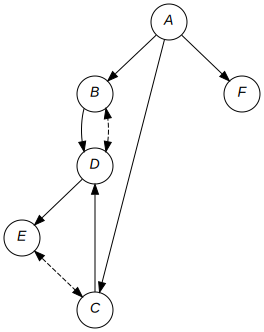

In [10]:
G = gobj.readgrapl(open('/root/HSCM/grapl/grapl/graphs/bareinboim_2020.grapl').read())
G

### Compute the Tian factorized joint distribution over variables $F,B,D$

In [11]:
str, eqn = algs.admgfactor(G,{'B','F','D'})
eqn

### Intervene on the variable $C$, render the mutilated graph, and compute the corresponding Tian factorization

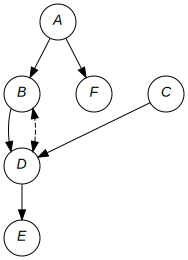

In [12]:
G_fixC = copy.deepcopy(G)
G_fixC.fix('C')
G_fixC

In [13]:
str, eqn = algs.admgfactor(G_fixC,{'B','F','D'})
eqn

### Read a DAG and draw it

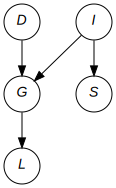

In [15]:
G = gobj.readgrapl(open('/root/HSCM/grapl/grapl/graphs/markov1.grapl').read())
G

### Compute all local Markov conditional independences, render in Latex

In [16]:
ciset, cistr, isdag = algs.localmarkov(G)
ciset

### Test whether $D$ is d-separated from $S$ given $G,I$, render in Latex if yes

In [17]:
isdsep, ci, cistr, isdag = algs.dseparate(G,{'D'},{'S'},{'G','I'})
isdsep

True

In [18]:
ci